### This is the introdution for the file:
#### We will intially explore the dataset and then answer some related questions of what we concerns
#### The dataset links is below： https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
#### And it provides some explanation for the variables.

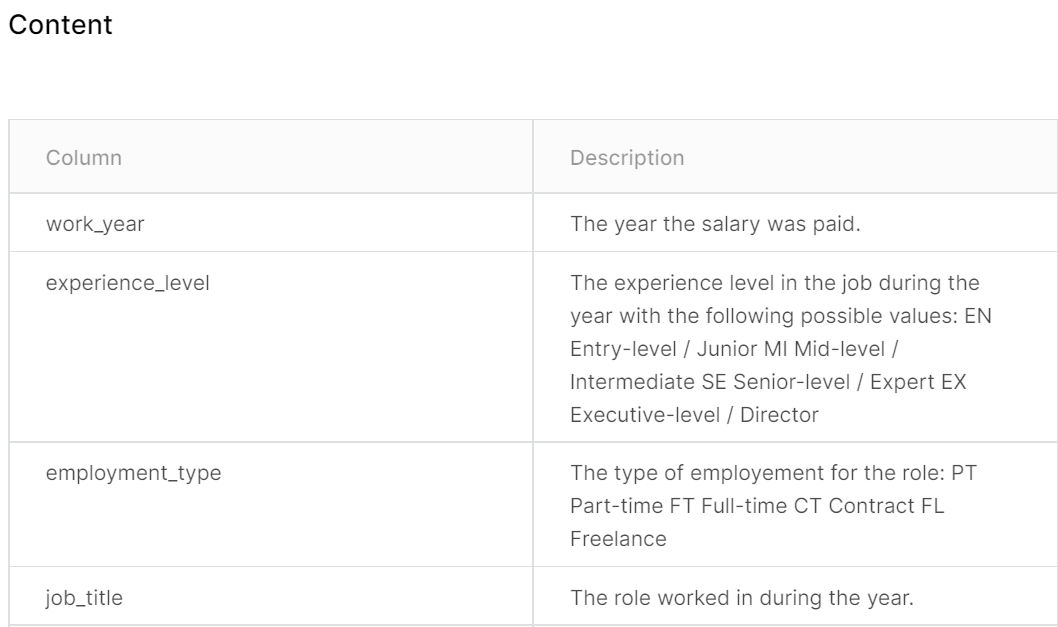

In [ ]:
# Import the os module
import os
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
#change directory 
path = 'C:\王琰\求职\python\data wrangling project'
os.chdir(path)

In [3]:
#read file and exploration
df = pd.read_csv('ds_salaries.csv',index_col= 0)
df.head(5)
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [4]:
#data clearing
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Start to answer questions

#### 1. Does the average salary go up by year? how does it perform in different region?

In [5]:
a = df.groupby(['work_year']).salary_in_usd.mean().sort_index()
a

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64

In [7]:
b = df.groupby(['work_year','company_location']).salary_in_usd.agg(['mean','max','min']).sort_index()
b

mean     max     min
work_year company_location                               
2020      AE                115000.000000  115000  115000
          AT                 82683.500000   91237   74130
          CA                117104.000000  117104  117104
          CN                 43331.000000   43331   43331
          DE                 67157.000000  148261   15966
...                                   ...     ...     ...
2022      NL                 62651.000000   62651   62651
          PK                 20000.000000   20000   20000
          PL                 35590.000000   35590   35590
          PT                 40119.000000   58255   21983
          US                145066.247788  405000   25000

[87 rows x 3 columns]

In [ ]:
b.to_excel('b.xlsx') #followed by Tableau for visualization

#### 2. At what expreince level in US and FR do they have the highest salary?

In [8]:
c = df.loc[df.company_location.isin(['FR','US'])].groupby(['experience_level','company_location']).salary_in_usd.mean().sort_values(ascending = False)
c

experience_level  company_location
EX                US                  243742.187500
SE                US                  151527.633028
MI                US                  125780.211111
SE                FR                   94075.750000
EN                US                   93112.903226
MI                FR                   57771.500000
EN                FR                   47325.600000
Name: salary_in_usd, dtype: float64

#### 3. where does these people work? do they work remotely?
####    when people do not work at the place the company locates, do they work remotely? how large of these people?

In [9]:
d = df.loc[df['company_location'] != df['employee_residence']]
d
d[['work_year','company_location','employee_residence','remote_ratio']]

,work_year,company_location,employee_residence,remote_ratio
17,2020,GB,PL,100
19,2020,US,PT,100
32,2020,US,GR,100
40,2020,US,PH,100
53,2020,DE,PK,100
54,2020,US,RU,100
61,2020,US,ES,100
70,2020,LU,FR,50
73,2021,US,IN,100
82,2021,CA,GB,50


#### 4. Is there any company offer better salary than the average?

In [10]:
avg = df.salary_in_usd.mean()
df.loc[df['salary_in_usd']>=avg][['salary_in_usd','company_location']].groupby('company_location').size()

company_location
AE      2
AU      1
CA      9
CH      1
DE      5
FR      1
GB      8
IL      1
JP      2
NZ      1
PL      1
RU      1
US    237
dtype: int64